In [1]:
import pandas as pd


In [2]:
df=pd.read_csv("crop_yield.csv")
df.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909


In [3]:
df=df.drop(columns=['Crop','Crop_Year','Season','State'])
df.head()

,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,796.0,22,2051.4,75755.32,246.76,0.238333
3,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,1739.0,794,2051.4,165500.63,539.09,0.420909


In [4]:
from scipy.stats import skew,kurtosis
features=df.iloc[:-1]
skew=df.apply(skew)
kurtosis=df.apply(kurtosis)
distribution=pd.DataFrame({
    "mean":features.mean(),
    "Median":features.median(),
    "Mode":features.mode().iloc[0],
    "Variance":features.var(),
    "range":features.max()-features.min(),
    "InterQuartile":features.quantile(0.75)-features.quantile(0.25),
    "Skewness":skew,
    "Kurtosis":kurtosis
})
print(distribution)

                         mean      Median       Mode      Variance  \
Area             1.799236e+05     9316.50     1.0000  5.370650e+11   
Production       1.643676e+07    13803.50     0.0000  6.920240e+16   
Annual_Rainfall  1.437759e+03     1247.30  1434.5875  6.673748e+05   
Fertilizer       2.410338e+07  1234624.67   150.8000  9.015202e+15   
Pesticide        4.884707e+04     2421.15     0.9900  4.549377e+10   
Yield            7.995801e+01        1.03     1.0000  7.714606e+05   

                        range  InterQuartile   Skewness     Kurtosis  
Area             5.080810e+07   7.369500e+04  21.856553  1202.319280  
Production       6.326000e+09   1.213098e+05  19.297723   388.468265  
Annual_Rainfall  6.251400e+03   7.030000e+02   2.131623     6.972907  
Fertilizer       4.835407e+09   9.808862e+06  13.411577   408.350078  
Pesticide        1.575051e+07   1.967204e+04  25.633793  1546.334556  
Yield            2.110500e+04   1.788949e+00  12.784291   175.532434  


/Users/nirutthyushasri/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


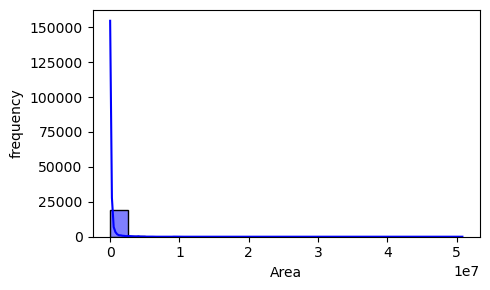

/Users/nirutthyushasri/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


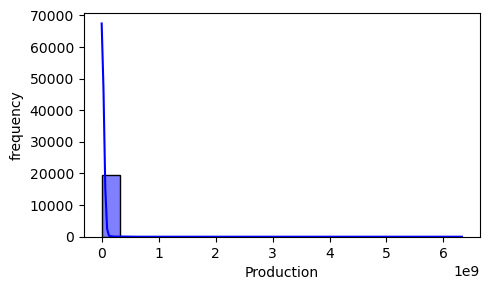

/Users/nirutthyushasri/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


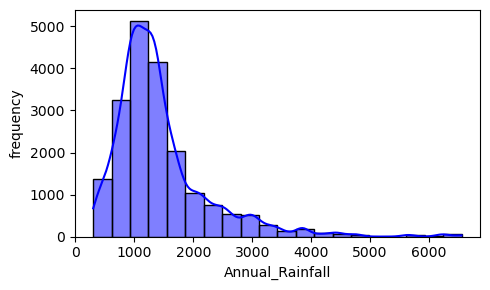

/Users/nirutthyushasri/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


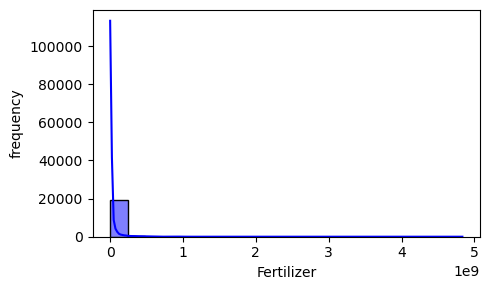

/Users/nirutthyushasri/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


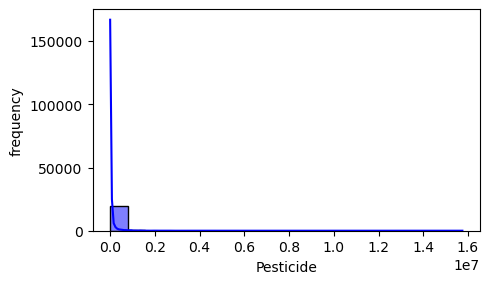

/Users/nirutthyushasri/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


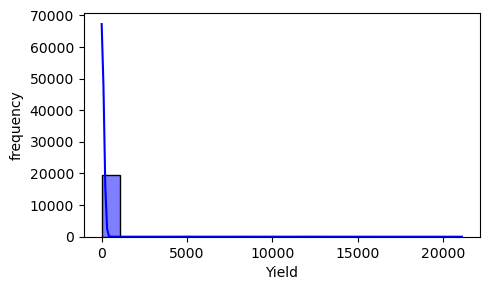

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
for columns in features:
    plt.figure(figsize=[5,3])
    sns.histplot(features[columns],kde=True,bins=20,color="Blue")
    plt.tight_layout()
    plt.xlabel(columns)
    plt.ylabel("frequency")
    plt.show()



In [6]:
import numpy as np
x=df.iloc[:,:-1]
y=df['Yield']
x=x.apply(lambda col:np.log1p(col))
y=np.log1p(y)

In [13]:
from sklearn.preprocessing import RobustScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
x_robust=RobustScaler()
y_robust=RobustScaler()
x_minmax=MinMaxScaler()
y_minmax=MinMaxScaler()
x_r=x_robust.fit_transform(x)
x_scaled=x_minmax.fit_transform(x_r)
y_r=y_robust.fit_transform(y.array.reshape(-1,1))
y_scaled=y_minmax.fit_transform(y_r)
models={
"linear_regression":LinearRegression(),
"RandomForestRegressor":RandomForestRegressor(),
"DecisionTreeRegressor":DecisionTreeRegressor()
}

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y_scaled,test_size=0.2,random_state=42)
for name,model in models.items():
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(name)
    print(mean_squared_error(y_test,y_pred))
    print(r2_score(y_test,y_pred))



linear_regression
0.0012199717643543435
0.9040100567381083


/var/folders/k3/7pqcbg3d7fq0wxfgw_xq0j740000gp/T/ipykernel_99005/872511013.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train,y_train)


RandomForestRegressor
0.00010114814148603627
0.9920414515761937
DecisionTreeRegressor
0.00024664419880425747
0.9805935158986033
